--------------------------------------------------------------------------------------------------------

<center> <h1> Anomaly Detection - Credit Card Fraud Analysis </h1> </center>

--------------------------------------------------------------------------------------------------------

<center>
** Groupe 13 members : ** <br>
    - Ahmed BEJAOUI
    - Aymen DABGHI 
    - Aymen MEJRI
    - Mohamed Rostom GHARBI 
    - Salma JERIDI.
</center>

<h2> Notebook plan : </h2>

1. [EDA](#EDA)  <br>
    1.1. [Class distribution](#1.1) <br>
    1.2. [Amount and time analysis](#1.2) <br>
    1.3. [Time transactions distribution](#1.3) <br>
    1.4. [t-SNE visualization](#1.4) <br>
    1.5. [Features distribution](#1.5) <br>
    1.6. [Correlation matrix](#1.6) <br>
2. [Models](#Models)  <br>
    2.1. [1st approch : Trainig over the whole dataset ](#2.1) <br>
    2.2. [2nd approach: Novelty detection](#2.2) <br>
    2.3. [K-means clustering](#2.3) <br>
3. [Performance](#Performance)  

--------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Check if there are any missing values
data.isnull().values.any()

False

------------------------------------------------------------------------------------------------------------------

<a class="anchor" id="EDA"></a> 

<h2> I. EDA : </h2> 

For this part of the notebook, we suppose that we still have our target column, just to make some analysis on the data.

For the model and performance parts of the notebook, we will remove this column, and try to make our predictions in an unsupervised manner. 

<a class="anchor" id="1.1"></a> 

\hspace{2cm}  <h3> 1.1 \hspace{1cm} Class distribution : </h3>

In [7]:
data_eda = data.copy()

In [8]:
data_eda['Class'] = data_eda['Class'].map(lambda x : 'Fraud' if x==1 else 'Normal')

Text(0, 0.5, 'Distribution class count')

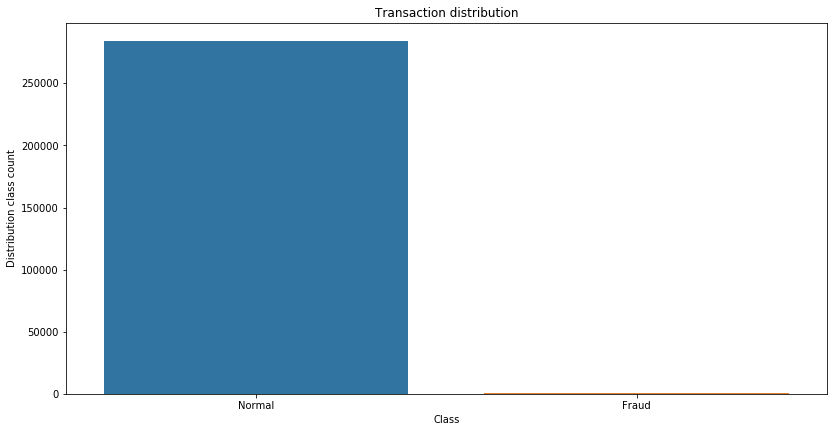

In [9]:
plt.figure(figsize = (30,15))
ax1 = plt.subplot2grid((2,2), (0,0))
sns.countplot(x = 'Class',  data = data_eda, ax = ax1)
ax1.set_title('Transaction distribution')
ax1.set_ylabel('Distribution class count')

Let us now count the number of frauds and normal transactions :

In [10]:
nb_fraud = data_eda[data_eda['Class']=='Fraud'].shape[0]
print('The number of frauds in the data set is : ', nb_fraud)
print("Which corresponds to %4.2f %% of the data"%(nb_fraud*100/data.shape[0]))

The number of frauds in the data set is :  492
Which corresponds to 0.17 % of the data


In [11]:
nb_normal = data_eda[data_eda['Class']=='Normal'].shape[0]
print('The number of normal transactions in the data set is : ', nb_normal)
print("Which corresponds to %4.2f %% of the data"%(nb_normal*100/data.shape[0]))

The number of normal transactions in the data set is :  284315
Which corresponds to 99.83 % of the data


<a class="anchor" id="1.2"></a> 

\hspace{2cm} <h3> 1.2 \hspace{1cm} Amount and time analysis :  </h3>

Next, we will try to use the 'Amount' and 'Time' columns to see if fraudulent transactions occur more during certain periods of the day, and if they are related to some specific amounts.

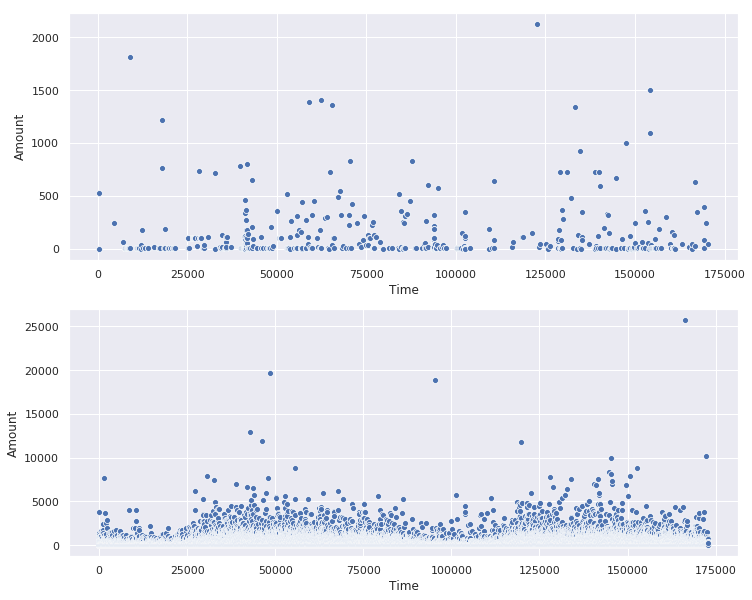

In [12]:
fraud = data[data['Class']==1]
not_fraud = data[data['Class']==0]
sns.set()
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.scatterplot(x='Time' , y='Amount' , data=fraud)
plt.subplot(2,1,2)
sns.scatterplot(x='Time' , y='Amount' , data=not_fraud)

We can not conclude anything related to time frames according the previous graph as the distribution of the frauds is not that significant. However, we can notice that the maximum amount of fraudulent transactions does not exceed 1500 (except for 2 cases).

<a class="anchor" id="1.3"></a> 

\hspace{2cm}  <h3> 1.3 \hspace{1cm} Time transactions distribution :  </h3>

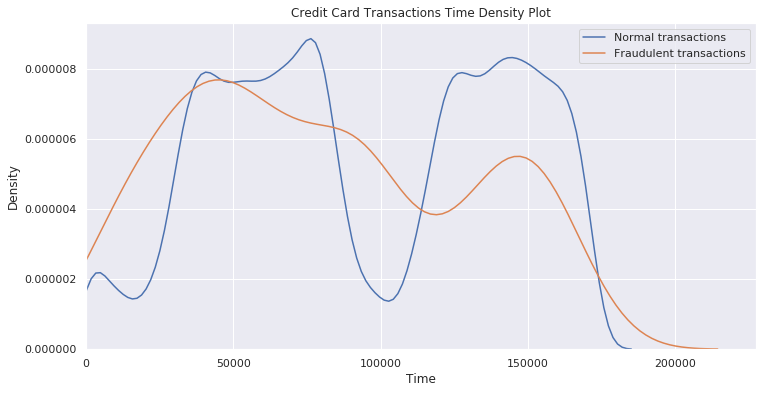

In [17]:
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]
plt.figure(figsize = (12,6))
plt.title('Credit Card Transactions Time Density Plot')
sns.kdeplot(class_0 , label="Normal transactions")
sns.kdeplot(class_1 , label="Fraudulent transactions")
plt.xlabel("Time")
plt.ylabel("Density")
plt.xlim(left=0)
plt.show()

The time is shown is seconds from the start of the time period (totaly 48h, over 2 days), Fraudulent transactions and normal transactions are almost evenly distributed in time, except for a certain period, which is probably night, where the normal transactions distribution decreases (related to a low transactions activity) while the fraudulent transactions does not have the same behaviour.
Fraudulent transactions could happen at any time of the day especially by night.

<a class="anchor" id="1.4"></a> 

 <h3> 1.4  t-SNE visualization :  </h3>

For this matter, let's make our data balanced :

In [13]:
Y_train = data['Class']
X_train = data.drop(columns=['Class'])

In [14]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)
X_resampled = pd.DataFrame(data=X_resampled, columns=X_train.columns)
y_resampled = pd.DataFrame(data=y_resampled, columns=['y'])

In [15]:
tsne = TSNE(n_components=2, random_state=0)
X_res = tsne.fit_transform(X_resampled[0:])

Text(0.5, 1.0, 't-SNE visualization')

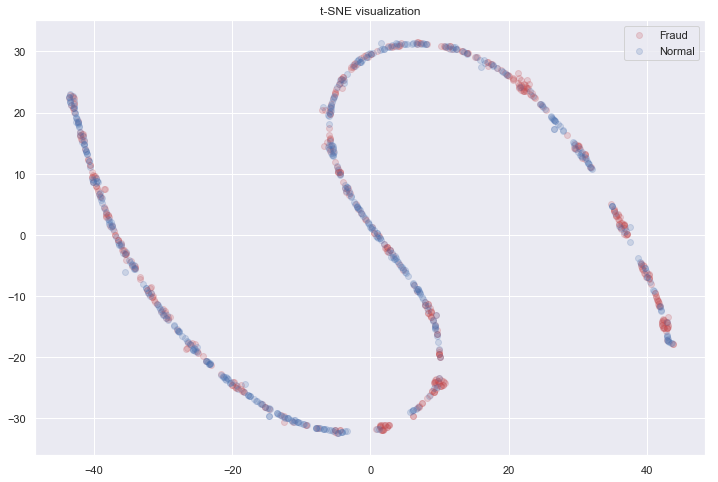

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(X_res[y_resampled['y'] == 1, 0], X_res[y_resampled['y'] == 1, 1], c='r', label='Fraud', alpha=0.2)
plt.scatter(X_res[y_resampled['y'] == 0, 0], X_res[y_resampled['y'] == 0, 1], c='b', label='Normal', alpha=0.2)
plt.legend(['Fraud', 'Normal'])
plt.title('t-SNE visualization')

Using t-SNE, we were able to see how frauded and normal transactions are distributed on a 2D plan. This approach is very good to enable us to see how the two classes are distributed graphicly. More of this approach is to come when we will use k-means later. 

<a class="anchor" id="1.5"></a> 

\hspace{2cm}  <h3> 1.5 \hspace{1cm} Features distribution :  </h3>

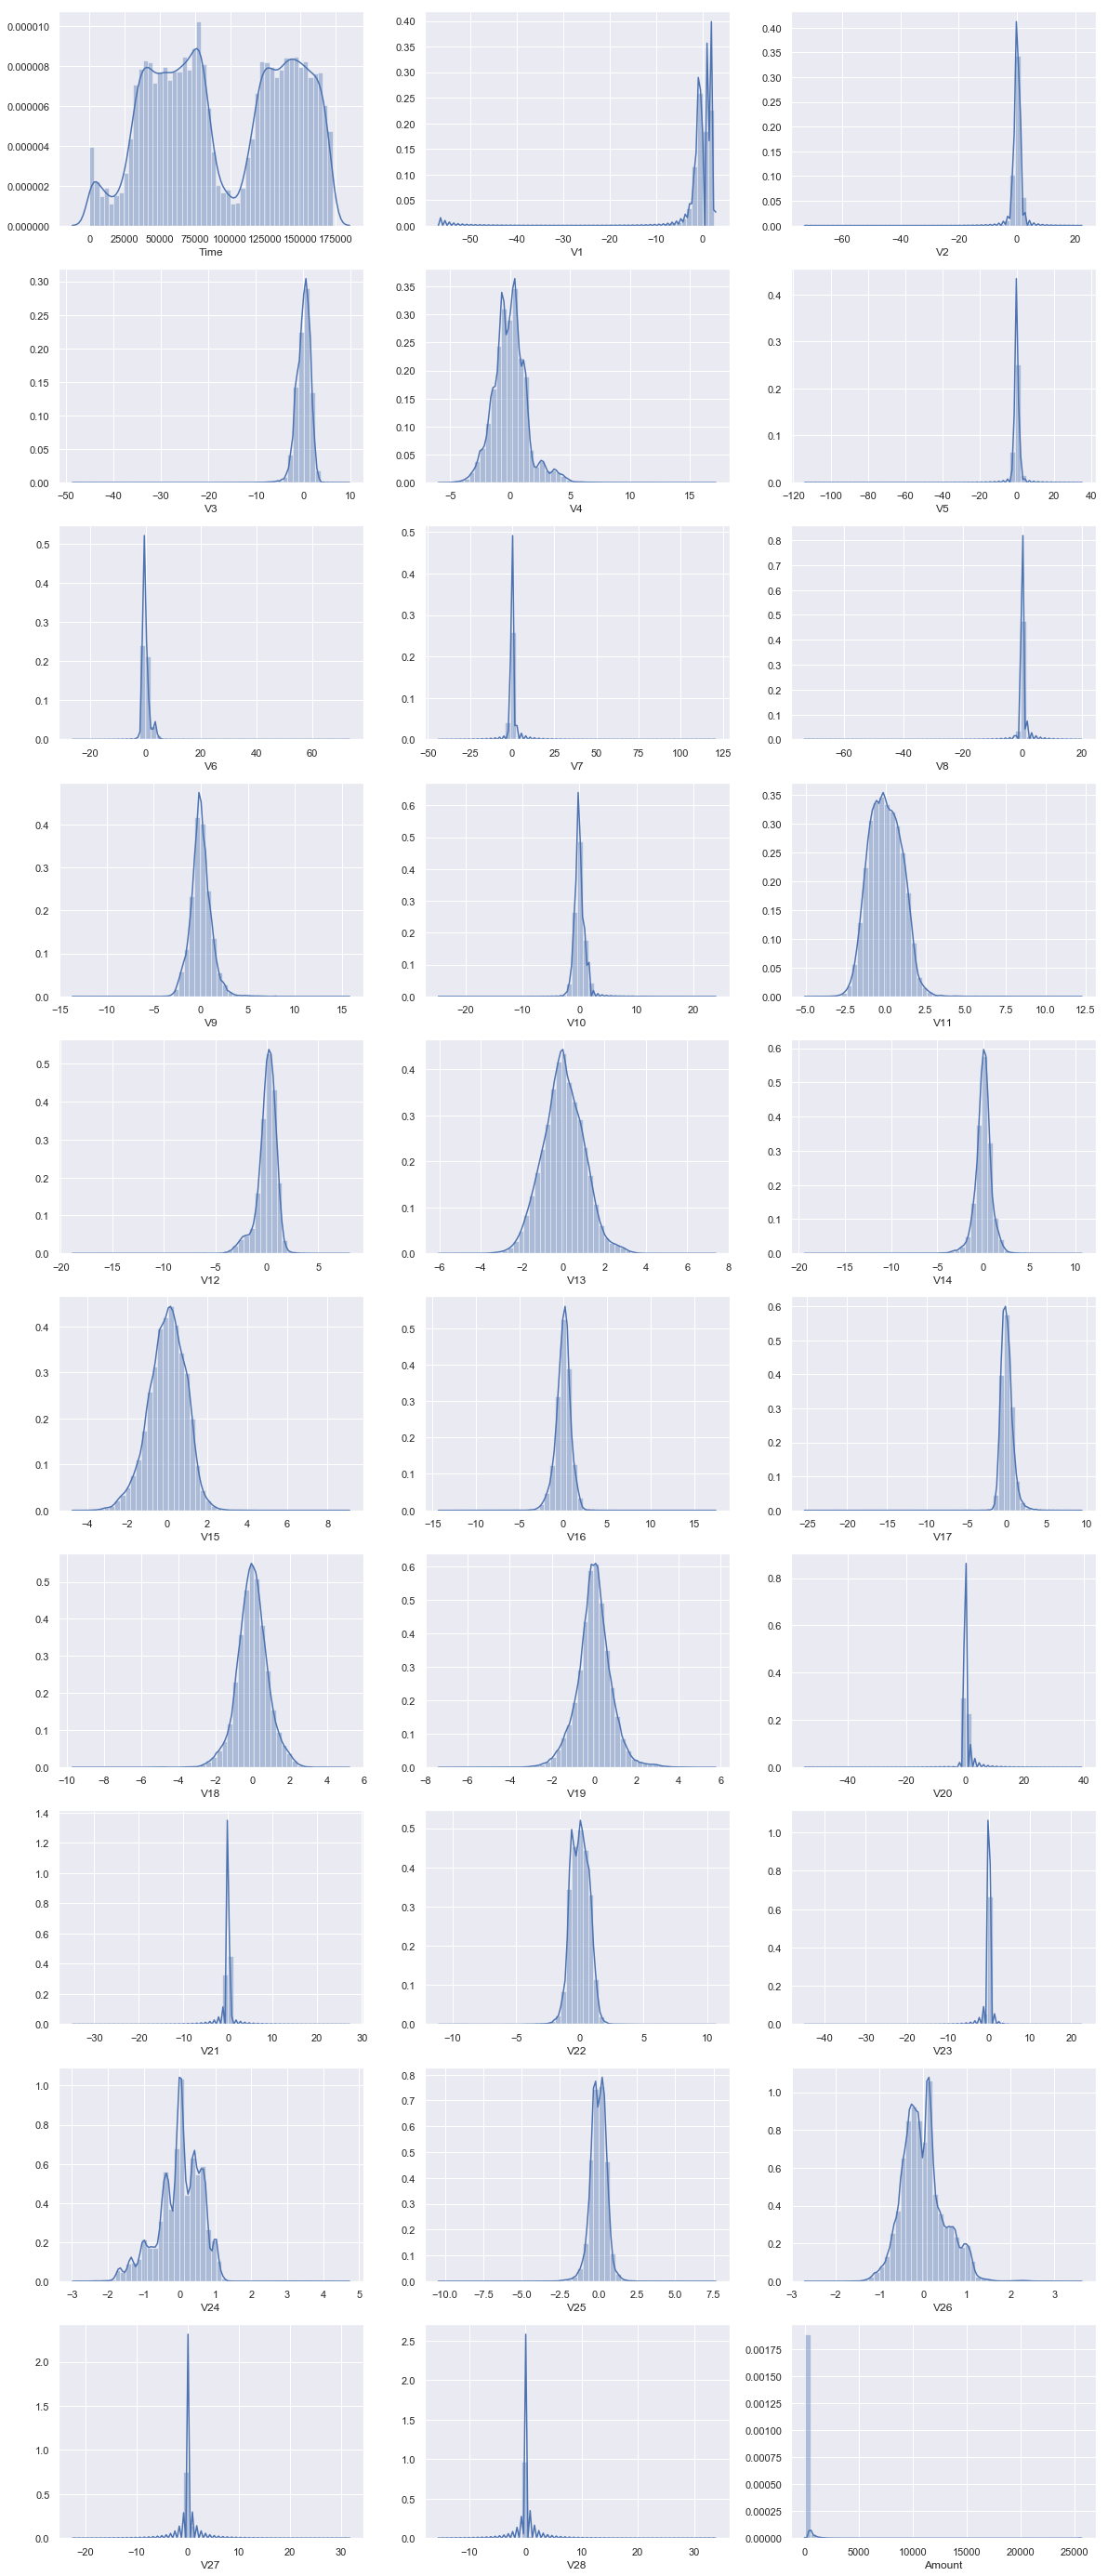

In [17]:
plt.figure(figsize=(20,50))
for i, feature in enumerate(X_train.columns):
    plt.subplot(10,3,i+1)
    sns.distplot(X_train[feature])

We can see from the above plots that the majority of features have a normal distribution. We can not conclude much about this since the features came from PCA, and they have no significant meaning. <br>


<a class="anchor" id="1.6"></a> 

\hspace{2cm}  <h3> 1.6 \hspace{1cm} Correlation matrix :  </h3>

Text(0.5, 1.0, 'Correlation matrix between the features')

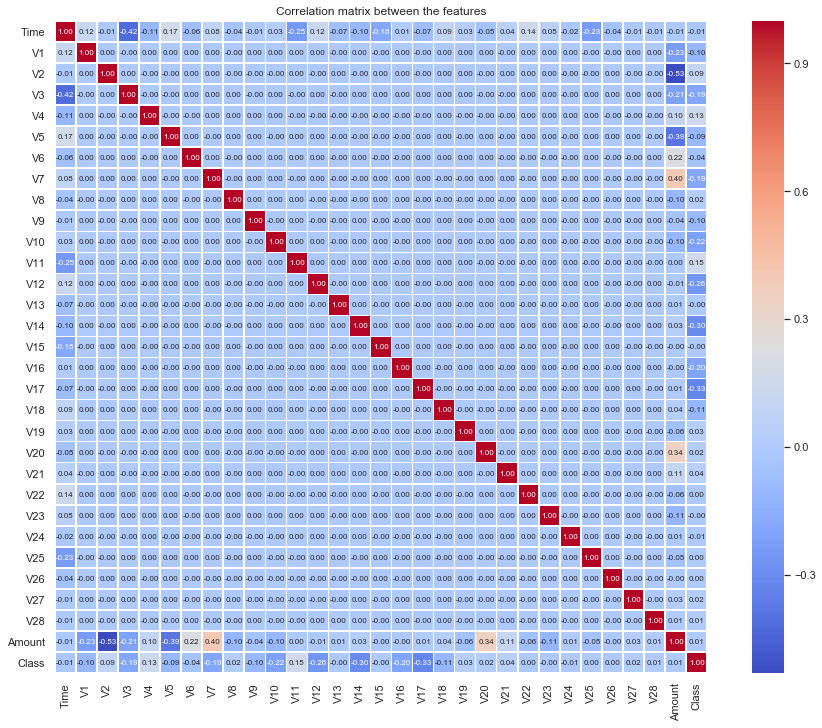

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(data.iloc[:,:].corr(), annot=True , square=True , fmt='.2f' , annot_kws={'size':8} , 
            cmap='coolwarm',linewidths=.5)
plt.title('Correlation matrix between the features')

**Fraud samples :**

Text(0.5, 1.0, 'Fraud Class')

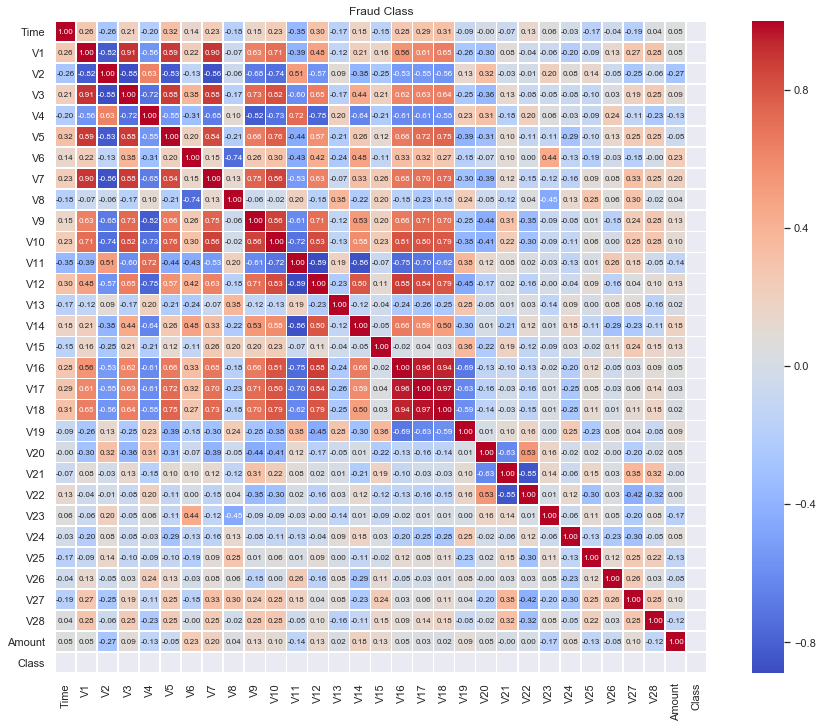

In [19]:
data_fraud = data[ data['Class']==1 ]

plt.figure(figsize=(16,12))
sns.heatmap(data_fraud.iloc[:,:].corr(), annot=True , square=True , fmt='.2f' , annot_kws={'size':8}, 
            cmap='coolwarm',linewidths=.5)
plt.title('Fraud Class')

**Normal samples :**

Text(0.5, 1.0, 'Normal Class')

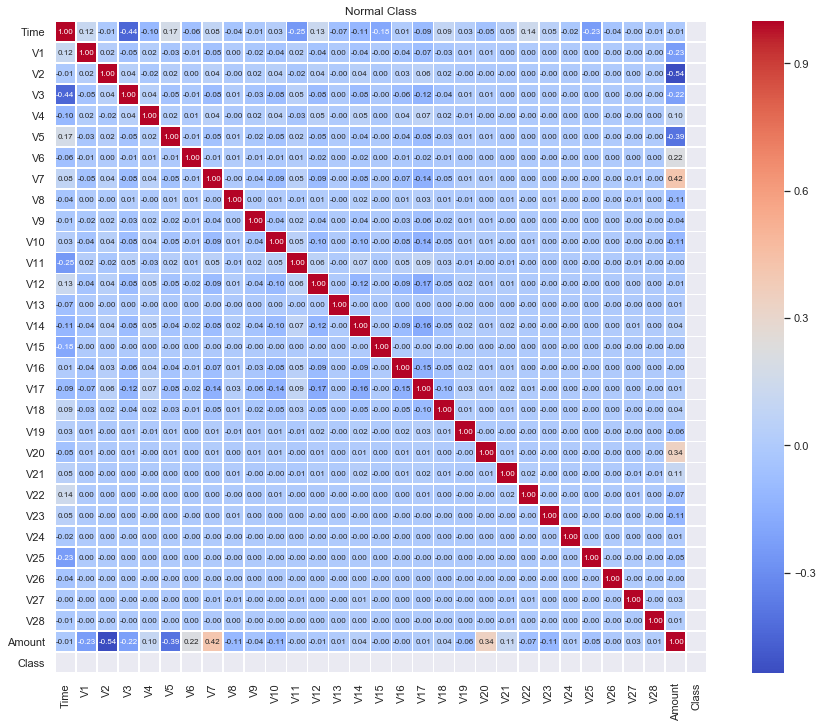

In [20]:
data_normal = data[ data['Class']==0 ]

plt.figure(figsize=(16,12))
sns.heatmap(data_normal.iloc[:,:].corr(), annot=True , square=True , fmt='.2f' ,annot_kws={'size':8}, 
            cmap='coolwarm',linewidths=.5)
plt.title('Normal Class')

We notice that the correlation between the different features has changed when we deal with the fraudulent transactions. 

Since we do not have the real meaning of the features, we can not interpret the correlation matrix. 

--------------------------------------------------------------------------------------------------------

<a class="anchor" id="Models"></a> 

<h2> II. Models : </h2> 

In this section, we will suppose that we don't have access to the true lablel of each observations. So we will remove the target "class" and we will try to use different unsupervised models to detect fraud transactions. We will mainly try the Isolation Forest and the Local Outlier Fraction (LOF) algorithms.


Later on, we will use the target class to evaluate the quality of our predictions. 

In [14]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
state = np.random.RandomState(42)

In [5]:
# y represent the target class
y = data.Class
# remove the target "Class" from the training
X = data.drop(columns=["Class"])


 <h3> 2.1 1st approach: Training over the whole dataset ( Normal + fraudulent  transactions) :  </h3>
<h4> 1st model:  Isolation Forest </h4> 


In [6]:
fraud_tr = (data['Class']==1).sum()

valid_tr = (data['Class']==0).sum()
# determine the fraction of the ouliers
outlier_fraction = fraud_tr / valid_tr

# train the model
isolation_fr =  IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction,random_state=state, verbose=0)
isolation_fr.fit(X)
scores_prediction = isolation_fr.decision_function(X)

In [8]:

def map_pred(y_):
    '''
    Since the predict method of the Isolation Forest Algorithm
    returns 1 for an inlier and -1 for an outlier, we will transform 
    these values for consistency purpose
    '''
    y_[y_ == 1] = 0
    y_[y_ == -1] = 1
    return y_


In [9]:
# prediction
y_pred_isolation_fr = map_pred(isolation_fr.predict(X))

/home/salma/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [10]:
from sklearn.metrics import classification_report,accuracy_score

def statistics(clf,y_pred):
    """
    this function returns some satistics on the performance of your classifier 
    (precision, recall, F1 score for each class)
    """
    errors = (y_pred != y).sum()
    # Run Classification Metrics
    print(clf,"-->",errors,"errors")
    f = (y_pred==1).sum()
    v = (y_pred==0).sum()
    outlier_fraction = f / v
    print("outlier fraction =",outlier_fraction)
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))


In [11]:
statistics("Isolation_forest",y_pred_isolation_fr)

Isolation_frorest --> 683 errors
outlier fraction = 0.00173399832579472
Accuracy Score :
0.9976018847851352
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.31      0.31       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807



**Notice: the accuarcy score is not a good metric for measuring the performance of our model as the data is highly imbalanced.** 

**When we use the Isolation Forest algorithm, we get 0.31 for the f1-score. The model, doesn't perform as we expected: it makes a lot of errors when trying to detect the fraudulent transactions. So we will try the LOF algrithm and we will see if we can achieve better performance.**


<h4> 2nd method: Local outlier fraction </h4> 


In [28]:
lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                   leaf_size=30, metric='minkowski',
                   p=2, metric_params=None, contamination=outlier_fraction)

In [29]:
y_pred_lof = map_pred(lof.fit_predict(X))
scores_prediction = lof.negative_outlier_factor_

In [30]:
statistics("LOF",y_pred_lof)

LOF --> 935 errors
outlier fraction = 0.00173399832579472
Accuracy Score :
0.9967170750718908
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



**When we train over the whole dataset, the LOF algorithm performs worse. it achieves a 0.05 f1_score.**



<a class="anchor" id="2.1"></a> 

 <h3> 2.1  2nd approach: Novelty detection : </h3> 

* Since the results returned by the above method are not so good, we are going to try a new one, the novelty detection method.

* This method consists in training the model on the part of the dataset that contains only non-fraudulent transactions.

<h3> 1st model:  Isolation Forest </h3> 

In [26]:
# Data processing
fraud = data[data['Class']==1]
not_fraud = data[data['Class']==0]

# Re-indexing the dataframe
fraud = fraud.reset_index()
fraud.drop('index' , axis=1 , inplace=True)

# Extracting the targets
y_fraud = fraud.Class.copy()
y_not_fraud = not_fraud.Class.copy()
fraud.drop('Class' , axis=1 , inplace=True)
not_fraud.drop('Class' , axis=1 , inplace=True)

In [27]:
# Splitting the non-fraudulent transactions dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(not_fraud, y_not_fraud, test_size=0.2, random_state=42)

# Building and training the model
iso_fr = IsolationForest(n_estimators=100, max_samples=len(X_train) , verbose=0)
iso_fr.fit(X_train)

IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples=227452, n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [29]:
# Testing the algorithm on X_test which contains only non-fraudulent transations
y_pred = map_pred(iso_fr.predict(X_test))

print('The accuracy of the Isolation Forest algorithm on the X_test is : ' 
      + str(accuracy_score(y_pred , y_test)*100) + ' %')

The accuracy of the Isolation Forest algorithm on the X_test is : 89.87390746179413 %


In [30]:
# Applying the algorithm on the fraud dataframe, which contains only fraudulent transactions
y_pred = map_pred(iso_fr.predict(fraud))

print('The accuracy of the Isolation Forest algorithm on the fraud dataframe is : ' 
      + str(accuracy_score(y_pred , y_fraud)*100) + ' %')

The accuracy of the Isolation Forest algorithm on the fraud dataframe is : 90.04065040650406 %


**It is clear that this method performs better than the previous one as it detects 90% of the fraudulent transations. However, we still have some false alarms and missed detections.**

<a class="anchor" id="2.2"></a> 

<h3> 2nd model:  Local outlier fraction  </h3> 

In [35]:
lof_ =  LocalOutlierFactor(novelty=True)
lof_.fit(X_train)

LocalOutlierFactor(algorithm='auto', contamination='legacy', leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=20, novelty=True, p=2)

In [36]:
# Testing the algorithm on X_test which contains only non-fraudulent transations
y_pred = map_pred(lof_.predict(X_test))

print('The accuracy of the Local Outlier Factor algorithm on the X_test is : ' 
      + str(accuracy_score(y_pred , y_test)*100) + ' %')

The accuracy of the Local Outlier Factor algorithm on the X_test is : 89.40611645534003 %


In [37]:
# Applying the algorithm on the fraud dataframe, which contains only fraudulent transactions
y_pred = map_pred(lof_.predict(fraud))

print('The accuracy of the Local Outlier Factor algorithm on the fraud dataframe is : ' 
      + str(accuracy_score(y_pred , y_fraud)*100) + ' %')

The accuracy of the Local Outlier Factor algorithm on the fraud dataframe is : 44.71544715447154 %


**Under novelty approche, LOF performs much better ( it passed from 5% precision in fraudulent detection to 44% accuracy) but it still worse than Isolation Forests.**

--------------------------------------------------------------------------------------------------------

<a class="anchor" id="2.3"></a> 

<h3> 2.3  K-means clustering : </h3> 


In [1]:
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [5]:
X = data.iloc[:,:-1]
y = data['Class']

X_scaled = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.33, random_state=500)

In [12]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
y_res = kmeans.predict(X_test)

In [22]:
y_res.shape, X_test.shape

((93987,), (93987, 3))

In [19]:
X_test = pd.DataFrame(X_test)

In [21]:
X_test['y'] = y_res

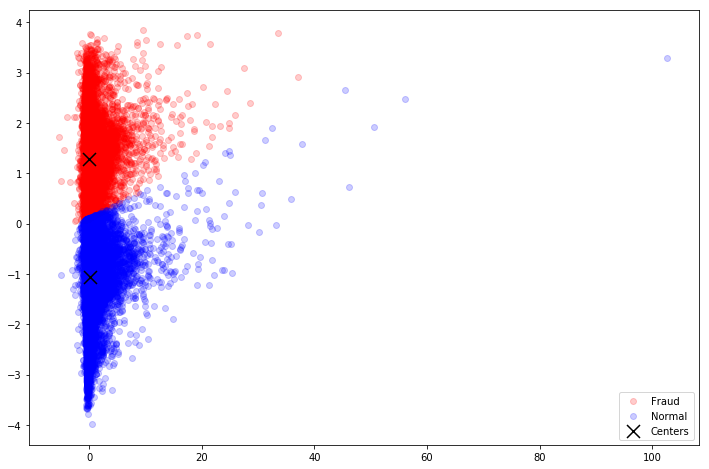

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(X_test[X_test['y'] == 1].loc[:,0], X_test[X_test['y'] == 1].loc[:,1], c='r', label='Fraud', alpha=0.2)
plt.scatter(X_test[X_test['y'] == 0].loc[:,0], X_test[X_test['y'] == 0].loc[:,1], c='b', label='Normal', alpha=0.2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='black', zorder=10)
plt.legend(['Fraud', 'Normal', 'Centers'])

As we see above, we have two clusters of both classes. K-means can be used in an unsupervised manner to enable us to do the clustering between normal and frauded transactions. 

<a class="anchor" id="Performance"></a> 

<h2> III. Performance : </h2> 

In [1]:
import pandas as pd 
data=pd.read_csv('creditcard.csv')

In [2]:
y_target=data['Class']
data.drop(columns=['Class'],inplace=True)

In [4]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# import matplotlib.pyplot as plt
# for the cluster to save the fig:
import matplotlib
matplotlib.use('Agg')

import sys

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.utils import shuffle as sh

from em import em, mv

# framework: outlier or novelty detection
novelty_detection = False

# parameters of the algorithm:
averaging = 10
max_features = 5
n_generated = 100000
alpha_min = 0.9
alpha_max = 0.999
t_max = 0.9
ocsvm_max_train = 10000

np.random.seed(1)


X,y=data.values,y_target.values
n_samples, n_features = np.shape(X)
n_samples_train = n_samples // 2
n_samples_test = n_samples - n_samples_train

X_train = X[:n_samples_train, :]
X_test = X[n_samples_train:, :]
y_train = y[:n_samples_train]
y_test = y[n_samples_train:]

if novelty_detection:
    # training and testing only on normal data:
    X_train = X_train[y_train == 0]
    y_train = y_train[y_train == 0]
    X_test = X_test[y_test == 0]
    y_test = y_test[y_test == 0]

# define models:
iforest = IsolationForest()
lof = LocalOutlierFactor(n_neighbors=20)
ocsvm = OneClassSVM()

n_samples, n_features = X_test.shape
em_iforest, mv_iforest = 0, 0
em_ocsvm, mv_ocsvm = 0, 0

nb_exp = 0

while nb_exp < averaging:
    features = sh(np.arange(n_features))[:max_features]
    X_train_ = X_train[:, features]
    X_ = X_test[:, features]

    lim_inf = X_.min(axis=0)
    lim_sup = X_.max(axis=0)
    volume_support = (lim_sup - lim_inf).prod()
    if volume_support > 0:
        nb_exp += 1
        t = np.arange(0, 100 / volume_support, 0.001 / volume_support)
        axis_alpha = np.arange(alpha_min, alpha_max, 0.001)
        unif = np.random.uniform(lim_inf, lim_sup,
                                 size=(n_generated, max_features))

        iforest.fit(X_train_)

        ocsvm.fit(X_train_[:min(ocsvm_max_train, n_samples_train - 1)])
        print ('end of ocsvm training!')

        s_X_iforest = iforest.decision_function(X_)
        print('s_X_iforest : ',s_X_iforest)

        s_X_ocsvm = ocsvm.decision_function(X_).reshape(1, -1)[0]

        s_unif_iforest = iforest.decision_function(unif)

        s_unif_ocsvm = ocsvm.decision_function(unif).reshape(1, -1)[0]

        em_iforest += em(t, t_max, volume_support, s_unif_iforest,
                         s_X_iforest, n_generated)[0]
        mv_iforest += mv(axis_alpha, volume_support, s_unif_iforest,
                         s_X_iforest, n_generated)[0]

        em_ocsvm += em(t, t_max, volume_support, s_unif_ocsvm,
                       s_X_ocsvm, n_generated)[0]
        mv_ocsvm += mv(axis_alpha, volume_support, s_unif_ocsvm,
                       s_X_ocsvm, n_generated)[0]

em_iforest /= averaging
mv_iforest /= averaging

em_ocsvm /= averaging
mv_ocsvm /= averaging


end of ocsvm training!
s_X_iforest :  [ 0.15323545  0.13551144 -0.17069539 ...  0.13148651  0.03832974
  0.12775829]

 failed to achieve t_max 


 failed to achieve t_max 

end of ocsvm training!
s_X_iforest :  [ 0.14263614  0.13242507 -0.15549957 ... -0.05370395  0.14140742
  0.14534154]

 failed to achieve t_max 


 failed to achieve t_max 

end of ocsvm training!
s_X_iforest :  [ 0.13348297  0.10274721 -0.1603183  ...  0.11862472  0.0296365
  0.07755143]

 failed to achieve t_max 

end of ocsvm training!
s_X_iforest :  [ 1.39247456e-01  1.38764451e-01 -2.04126112e-01 ...  1.26595770e-01
  6.99365177e-06  7.52026446e-02]

 failed to achieve t_max 


 failed to achieve t_max 

end of ocsvm training!
s_X_iforest :  [ 0.12079825  0.12553945 -0.12887848 ...  0.00587941  0.07196793
  0.12380416]

 failed to achieve t_max 


 failed to achieve t_max 

end of ocsvm training!
s_X_iforest :  [ 0.14411242  0.13009414 -0.15905622 ...  0.07381088  0.14072272
  0.12130237]

 failed to achieve t_m

In [5]:
with open('result_em_bench_high_unsupervised_with' + str(alpha_min) + '_factorized_with' + '_'+ str(max_features) + '_' + str(averaging) + '_' + '.txt', 'a') as result:
    result.write('em_iforest = ' + str(em_iforest) + '\n')
    result.write('em_ocsvm = ' + str(em_ocsvm) + '\n \n')

    result.write('mv_iforest = ' + str(mv_iforest) + '\n')
    result.write('mv_ocsvm = ' + str(mv_ocsvm) + '\n')

In [6]:
print('em_iforest = ' + str(em_iforest))
print('em_ocsvm = ' + str(em_ocsvm) + '\n \n')

print('mv_iforest = ' + str(mv_iforest) )
print('mv_ocsvm = ' + str(mv_ocsvm) + '\n')

em_iforest = 1.8111643240835514e-06
em_ocsvm = 2.50277785252063e-06
 

mv_iforest = 419027.3226077921
mv_ocsvm = 48125416.655199155



In the unsupervised case, we took as reference the article  entitled Mass Volume Curves and Anomaly Ranking which suggests as metric the MV (Mass-curve) (or the EM) 

The MV is a concept similar to the concept of ROC except that here the weaker is MV the better is the model.
here we can observe from the result that the isolation forest model is better than the one-class-svm model because it has lower MV. 

ref : 
[Mass Volume Curves and Anomaly Ranking](https://hal.archives-ouvertes.fr/hal-01516919/document)